# 异常用户检测——机器学习方法

数据加载和预处理

1. 贝叶斯

2. KNN

3. 决策树

4. SVM

5. 随机森林

6. Adaboost

In [62]:
from sklearn.feature_extraction import DictVectorizer  
import csv  
from sklearn import preprocessing  
from sklearn import tree  
import numpy as np

 
import scipy as sp  
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report   
from sklearn.model_selection import train_test_split 

from sklearn.datasets import load_iris

import sys
import os       

import matplotlib.pyplot as plt
from sklearn.datasets import load_files  
from sklearn.feature_extraction.text import  CountVectorizer  
from sklearn.feature_extraction.text import  TfidfVectorizer  
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   微博数               1789 non-null   int64  
 1   粉丝数               1789 non-null   int64  
 2   关注数               1789 non-null   int64  
 3   is_spammer        1789 non-null   object 
 4   follow_ratio      1789 non-null   float64
 5   like_count        1789 non-null   int64  
 6   repost_count      1789 non-null   int64  
 7   comment_count     1789 non-null   int64  
 8   tweet_count       1789 non-null   int64  
 9   ave_like          1789 non-null   float64
 10  ave_repost        1789 non-null   float64
 11  ave_comment       1789 non-null   float64
 12  att_count         1789 non-null   int64  
 13  jing_count        1789 non-null   int64  
 14  zhuanfa_count     1789 non-null   int64  
 15  url_count         1789 non-null   int64  
 16  ave_att           1789 non-null   float64


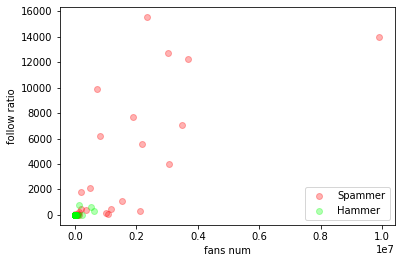

In [95]:
# Visualizing Dataset
# 一些简单的可视化，方便我们选择特征
# dataset = pd.read_csv(r"spammer.csv",encoding='UTF-8')
# dataset = dataset.drop(["user_id",'user_name','user_image','homepage','gender','message'], axis = 1) #把user id等无关变量去掉


# real/fake dataset
# dataset = pd.read_csv(r"new/new_usr_info.csv",encoding='UTF-8')
# dataset = dataset.drop(["id",'昵称','性别','地区','教育','阳光信用','注册时间','个人简介'], axis = 1) #把user id等无关变量去掉

# dataset = pd.read_csv(r"new/usr_info_with_theme.csv",encoding='UTF-8')
# dataset = dataset.drop(['Unnamed: 0','id','昵称','性别','地区','教育','阳光信用','注册时间','个人简介'], axis = 1) #把user id等无关变量去掉


dataset = pd.read_csv(r"usrs_with_simi.csv",encoding='UTF-8')
dataset = dataset.drop(['Unnamed: 0','Unnamed: 0.1','id','昵称','性别','地区','教育','阳光信用','注册时间','个人简介'], axis = 1) #把user id等无关变量去掉

dataset.info()

spammer = dataset[dataset.is_spammer == "yes"]
non_spammer = dataset[dataset.is_spammer == "no"]

# plt.title("comment_count vs follow_ratio")#选取横纵坐标分别为相似文本个数和地址
plt.xlabel("fans num")
plt.ylabel("follow ratio")
plt.scatter(spammer['粉丝数'], spammer.follow_ratio, color = "red", label = "Spammer", alpha = 0.3)
plt.scatter(non_spammer['粉丝数'], non_spammer.follow_ratio, color = "lime", label = "Hammer", alpha = 0.3)
plt.legend()
plt.show()


## 1. Bayes Method

gaussian bayes

multinomial bayes

...



In [98]:
# Gaussian Bayes method
# 高斯贝叶斯方法
x = dataset.drop(["is_spammer",'sina_helper_fan'], axis = 1)
x = (x - np.min(x)) / (np.max(x) - np.min(x)) #归一化变量
lb = preprocessing.LabelBinarizer()  #标签变成0-1向量
y = lb.fit_transform(dataset.is_spammer)  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)#划分为训练集和测试集
nb = GaussianNB()
clf = nb.fit(x_train, y_train)
answer = clf.predict_proba(x_test)[:,1]  
report = answer > 0.5  
scores = cross_val_score(nb, x, y.ravel(), cv=5,scoring='accuracy')
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('Gaussian Bayes Method Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.513129 (+/- 0.046122)
Gaussian Bayes Method Result:
              precision    recall  f1-score   support

         yes      0.524     0.984     0.684       186
          no      0.667     0.035     0.066       172

    accuracy                          0.528       358
   macro avg      0.596     0.509     0.375       358
weighted avg      0.593     0.528     0.387       358



d:\python3.9\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
# Multinomial Bayes Method
# 多项式贝叶斯
nb = MultinomialNB()
clf = nb.fit(x_train, y_train)
answer = clf.predict_proba(x_test)[:,1]  
report = answer > 0.5  
scores = cross_val_score(nb, x, y.ravel(), cv=5,scoring='accuracy')
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('Multinomial Bayes Method Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.688101 (+/- 0.094693)
Multinomial Bayes Method Result:
              precision    recall  f1-score   support

         yes      0.755     0.613     0.677       186
          no      0.652     0.785     0.712       172

    accuracy                          0.696       358
   macro avg      0.704     0.699     0.694       358
weighted avg      0.706     0.696     0.694       358



d:\python3.9\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
class Bayes():
    def naive_bayes(self,filename):
        '''
        朴素贝叶斯分类器
        优点：快，易懂
        缺点: 通过观察法选择参数和baseline，非常不靠谱
        '''

        # attnum=4 #attribute number
        attrname=['content_similar','figure_url','figure_jing','follow_ratio','average_repost','class','figure_at','is_regular'] #attribute name
        attrnum = len(attrname)
        baseline=[10,0.3,0.2,3,0.1,3,0.1,0.5] #baseline that divide attribute number into high part and low part
        group_num=10 #分成十组，九组训练一组验证
        
        precision1=0.0
        recall1=0.0
        precision2=0.0
        recall2=0.0
        f1score1=0.0
        f1score2=0.0

        class attributes:
            name=''
            high_spam=0
            low_spam=0
            high_nonspam=0
            low_nonspam=0
            baseline=0.0
            num=0.0
            sum=0
            spam_sum=0
            nonspam_sum=0

        attlist = [ attributes() for i in range(attrnum)] 
                
        for i in range(attrnum):
            attlist[i].name=attrname[i]
            attlist[i].baseline=baseline[i]

        rownum=1
        for test_group in range(group_num): #将第i组作为测试组
            with open(filename,"r",encoding='UTF-8') as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    rownum=rownum+1
                    if rownum%group_num!=test_group: 
                        for i in range(attrnum):                 
                            attlist[i].num=float(row.get(attlist[i].name))
                            is_spam=row.get('is_spammer')
                            if attlist[i].num>=attlist[i].baseline and is_spam=='yes':
                                attlist[i].high_spam=attlist[i].high_spam+1
                            elif attlist[i].num<attlist[i].baseline and is_spam=='yes':
                                attlist[i].low_spam=attlist[i].low_spam+1
                            elif attlist[i].num>=attlist[i].baseline and is_spam=='no':
                                attlist[i].high_nonspam=attlist[i].high_nonspam+1
                            elif attlist[i].num<attlist[i].baseline and is_spam=='no':
                                attlist[i].low_nonspam=attlist[i].low_nonspam+1

                for i in range(attrnum):
                    attlist[i].sum=attlist[i].high_spam + attlist[i].low_spam + attlist[i].high_nonspam + attlist[i].low_nonspam
                    attlist[i].spam_sum=attlist[i].high_spam + attlist[i].low_spam
                    attlist[i].nonspam_sum=attlist[i].high_nonspam + attlist[i].low_nonspam 

                spam_p=1.0*attlist[1].spam_sum/(attlist[1].sum) #spammer比例
                nonspam_p=1.0*attlist[1].nonspam_sum/(attlist[1].sum) #非spammer的比例

                tp=0
                tn=0
                fp=0
                fn=0
                rownum=0
                with open(filename,"r",encoding='UTF-8') as csvfile_new:
                    reader = csv.DictReader(csvfile_new)
                    for row in reader:
                        rownum=rownum+1
                        ps=1.0
                        pns=1.0
                        if rownum%group_num==test_group:
                            for i in range(attrnum):  
                                cur_num=float(row.get(attlist[i].name))
                                is_spam=row.get('is_spammer')
                                if cur_num>=attlist[i].baseline :
                                    ps=ps*(1.0*attlist[i].high_spam/attlist[i].spam_sum)
                                    pns=pns*(1.0*attlist[i].high_nonspam/attlist[i].nonspam_sum) 
                                elif cur_num<attlist[i].baseline:
                                    ps=ps*(1.0*attlist[i].low_spam/attlist[i].spam_sum)
                                    pns=pns*(1.0*attlist[i].low_nonspam/attlist[i].nonspam_sum)
                                
                                ps=1.0*ps*spam_p # probability of spammer
                                pns=1.0*pns*nonspam_p # probability of non_spammer
                                
                            if ps>pns and is_spam=="yes": #build confusion matrix
                                tp=tp+1
                            elif ps<pns and is_spam=="no":
                                tn=tn+1
                            elif ps<=pns and is_spam=="yes":
                                fp=fp+1
                            elif ps>=pns and is_spam=="no":
                                fn=fn+1

                precision1=1.0*tp/(tp+fp)+precision1
                precision2=1.0*tn/(tn+fn)+precision2
                recall1=1.0*tp/(tp+fn)+recall1
                recall2=1.0*tn/(tn+fp)+recall2     
        precision1=precision1/group_num #平均准确率和召回率
        precision2=precision2/group_num
        recall1=recall1/group_num
        recall2=recall2/group_num

        f1score1=2.0*precision1*recall1/(precision1+recall1)
        f1score2=2.0*precision2*recall2/(precision2+recall2)

        print('results of naive bayes:')

        print("     precision\trecall\tf-score")
        print("yes  ",round(precision1,2),"\t",round(recall1,2),"\t",round(f1score1,2))
        print("no   ",round(precision2,2) ,"\t",round(recall2,2),"\t",round(f1score2,2))
        print("avg  ",round((precision1+precision2)/2,2),"\t",round((recall1+recall2)/2,2),"\t",round((f1score1+f1score2)/2,2))        
        

file_path = 'spammer.csv'
classifier = Bayes()
classifier.naive_bayes(file_path)



results of naive bayes:
     precision	recall	f-score
yes   0.67 	 0.86 	 0.76
no    0.89 	 0.73 	 0.8
avg   0.78 	 0.8 	 0.78


## 2. KNN method

统计计算离它最近的k个账号中spammer账号与非spammer账号的计数值，将其归类为计数值较大的类别


In [78]:
model = KNeighborsClassifier(n_neighbors=50)
clf = model.fit(x_train,y_train)
answer = clf.predict_proba(x_test)[:,1]  
report = answer > 0.5  
scores = cross_val_score(model, x, y.ravel(), cv=5,scoring='accuracy')
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('KNearestNeighbors Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

d:\python3.9\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


五折交叉验证结果：	 0.730570 (+/- 0.115124)
KNearestNeighbors Result:
              precision    recall  f1-score   support

         yes      0.858     0.618     0.719       186
          no      0.683     0.890     0.773       172

    accuracy                          0.749       358
   macro avg      0.771     0.754     0.746       358
weighted avg      0.774     0.749     0.745       358



## 3. Decision Tree

ID3

CART剪枝

...

In [79]:
# ID3 method
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=20)
scores = cross_val_score(model_dt, x, y.ravel(), cv=5,scoring='accuracy')
clf_dt = model_dt.fit(x_train,y_train)
answer = clf_dt.predict_proba(x_test)[:,1]
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('Decision Tree ID3 Result:')
print(classification_report(y_test, answer, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.793199 (+/- 0.157495)
Decision Tree ID3 Result:
              precision    recall  f1-score   support

         yes      0.861     0.833     0.847       186
          no      0.826     0.855     0.840       172

    accuracy                          0.844       358
   macro avg      0.843     0.844     0.843       358
weighted avg      0.844     0.844     0.844       358



In [89]:
# CART prune
model_dt=DecisionTreeClassifier(criterion='gini',max_depth=15)

scores = cross_val_score(model_dt, x, y.ravel(), cv=5,scoring='accuracy')
clf_dt = model_dt.fit(x_train,y_train)
answer = clf_dt.predict_proba(x_test)[:,1]
answer = answer>0.5
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('Decision Tree CART Result:')
print(classification_report(y_test, answer, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.790403 (+/- 0.147301)
Decision Tree CART Result:
              precision    recall  f1-score   support

         yes      0.862     0.871     0.866       186
          no      0.859     0.849     0.854       172

    accuracy                          0.860       358
   macro avg      0.860     0.860     0.860       358
weighted avg      0.860     0.860     0.860       358



In [90]:
#保存决策树的结果
with open("ID3.dot", 'w') as f:
    f = tree.export_graphviz(clf_dt, out_file=f)
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\\bin'
import pydotplus 
dot_data = tree.export_graphviz(clf_dt, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("cart.pdf")

True

## 4. SVM 支持向量机

In [81]:
clf_svm = SVC(kernel='rbf', probability=True)
scores = cross_val_score(clf_svm, x, y.ravel(), cv=5,scoring='accuracy')
clf_svm = clf_svm.fit(x_train, y_train.ravel())
answer = clf_svm.predict_proba(x_test)[:,1]
report = answer>0.5
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('SVM rbf Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.801006 (+/- 0.128242)
SVM rbf Result:
              precision    recall  f1-score   support

         yes      0.854     0.785     0.818       186
          no      0.786     0.855     0.819       172

    accuracy                          0.818       358
   macro avg      0.820     0.820     0.818       358
weighted avg      0.821     0.818     0.818       358



In [82]:
clf_svm = SVC(kernel='linear', probability=True)
scores = cross_val_score(clf_svm, x, y.ravel(), cv=5,scoring='accuracy')
clf_svm = clf_svm.fit(x_train, y_train.ravel())
answer = clf_svm.predict_proba(x_test)[:,1]
report = answer>0.5
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('SVM rbf Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.787625 (+/- 0.127378)
SVM rbf Result:
              precision    recall  f1-score   support

         yes      0.819     0.801     0.810       186
          no      0.790     0.808     0.799       172

    accuracy                          0.804       358
   macro avg      0.804     0.805     0.804       358
weighted avg      0.805     0.804     0.805       358



## 5. Random Forest

随机森林涉及从训练数据集中的引导样本构建大量决策树，例如bagging，因此他的运算速度会有些慢，但是与此同时他的分类效果也是最好的。
由于不涉及剪枝，他可能会有略微过拟合。

In [99]:
clf_rf = RandomForestClassifier()
scores = cross_val_score(clf_rf, x, y.ravel(), cv=5,scoring='accuracy')
clf_rf = clf_rf.fit(x_train, y_train.ravel())
answer = clf_rf.predict_proba(x_test)[:,1]
report = answer>0.5
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('SVM rbf Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.849117 (+/- 0.187029)
SVM rbf Result:
              precision    recall  f1-score   support

         yes      0.880     0.909     0.894       186
          no      0.898     0.866     0.882       172

    accuracy                          0.888       358
   macro avg      0.889     0.887     0.888       358
weighted avg      0.889     0.888     0.888       358



In [100]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = x_train.columns
feature_list=[]
for f in range(x_train.shape[1]):
    feature_list.append([feat_labels[indices[f]],importances[indices[f]]])
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) 关注数                            0.185645
 2) follow_ratio                   0.107558
 3) 微博数                            0.102989
 4) simiscore                      0.089827
 5) 粉丝数                            0.079730
 6) fan_fan_ave                    0.059374
 7) comment_count                  0.043250
 8) ave_att                        0.024150
 9) ave_comment                    0.022005
10) most_theme_pct                 0.021577
11) most_theme_7                   0.021517
12) att_count                      0.021204
13) followed_fan_ave               0.020741
14) most_theme_5                   0.020364
15) ave_like                       0.019132
16) ave_jing                       0.017445
17) tweet_count                    0.016216
18) like_count                     0.016203
19) ave_zhuanfa                    0.014792
20) jing_count                     0.014587
21) theme_num                      0.013344
22) mutual                         0.011800
23) zhuanfa_count               

In [16]:
import csv
with open("feature_output.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(feature_list)

>10 0.827321 (0.099251)
>50 0.856952 (0.091057)
>100 0.846896 (0.096382)
>500 0.848566 (0.099166)
>1000 0.845776 (0.095273)


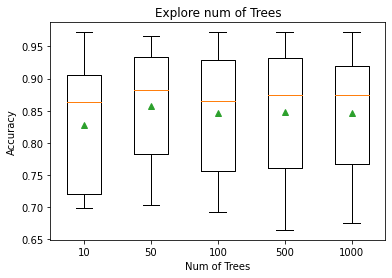

In [32]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.6f (%.6f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Explore num of Trees')
plt.xlabel('Num of Trees')
plt.ylabel('Accuracy')
plt.show()

>3 0.830117 (0.086544)
>4 0.834025 (0.086325)
>5 0.847448 (0.086223)
>6 0.854714 (0.083466)
>7 0.848566 (0.088064)
>None 0.856393 (0.092985)


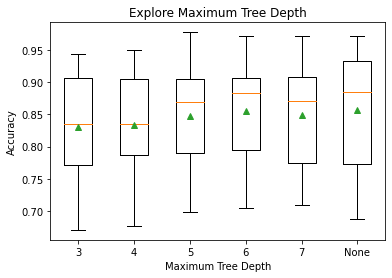

In [22]:
def get_models():
    models=dict()
    depths = [i for i in range(3,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=10, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.6f (%.6f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Explore Maximum Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.show()

## 6. Adaboost
使用同一个训练集
训练不同的弱分类器，然后把这些弱分类器集合起来，构成一个强的最终分类器


In [87]:
clf_adb = AdaBoostClassifier()
scores = cross_val_score(clf_adb, x, y.ravel(), cv=5)
clf_adb = clf_adb.fit(x_train, y_train.ravel())
answer = clf_adb.predict_proba(x_test)[:,1]
report = answer>0.5
print('五折交叉验证结果：\t %6f'%scores.mean()+' (+/- %6f)'%(scores.std()*2))
print('SVM rbf Result:')
print(classification_report(y_test, report, target_names = ['yes', 'no'],digits=3)) 

五折交叉验证结果：	 0.820051 (+/- 0.228923)
SVM rbf Result:
              precision    recall  f1-score   support

         yes      0.901     0.882     0.891       186
          no      0.875     0.895     0.885       172

    accuracy                          0.888       358
   macro avg      0.888     0.889     0.888       358
weighted avg      0.889     0.888     0.888       358



总结：

决策树和决策森林的效果在几种方法中间最突出

当加入主题信息之后对于异常粉丝和正常粉丝的分类变得非常明显，分类效果有显著提升。